In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


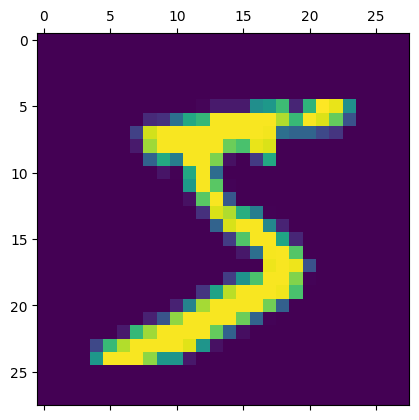

In [3]:
plt.matshow(x_train[0])


In [4]:
x_train = x_train /255
x_test = x_test / 255

In [5]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [6]:
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.4663 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9256


In [7]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.9266


[0.2680980861186981, 0.9265999794006348]

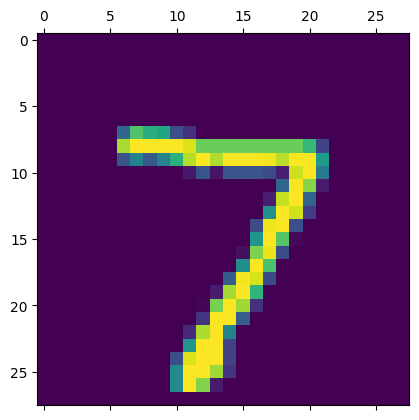

In [8]:
plt.matshow(x_test[0])

In [15]:
predicted = model.predict(x_test_flattened)
predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.6775787e-02, 3.5790274e-07, 4.6153724e-02, 9.3559307e-01,
       2.9286460e-03, 8.9090407e-02, 1.4864635e-06, 9.9973559e-01,
       8.8801272e-02, 6.6596204e-01], dtype=float32)

In [16]:
np.argmax(predicted[0])

7

In [13]:
predicted[0]

array([2.6775787e-02, 3.5790274e-07, 4.6153724e-02, 9.3559307e-01,
       2.9286460e-03, 8.9090407e-02, 1.4864635e-06, 9.9973559e-01,
       8.8801272e-02, 6.6596204e-01], dtype=float32)

In [18]:
labels_predicted = [np.argmax(i) for i in predicted]
labels_predicted[:5]

[7, 2, 1, 0, 4]

In [21]:
cf_matrix = tf.math.confusion_matrix(predictions=labels_predicted,labels=y_test)

In [23]:
cf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [  11,    9,  918,   16,    8,    2,   13,   11,   41,    3],
       [   4,    0,   22,  920,    0,   19,    3,   10,   23,    9],
       [   2,    1,    2,    1,  918,    0,   11,    3,   10,   34],
       [  12,    3,    2,   35,   12,  765,   17,    7,   34,    5],
       [  15,    3,    4,    1,    7,    8,  915,    2,    3,    0],
       [   2,    6,   21,    4,    9,    0,    0,  948,    3,   35],
       [  12,    7,    5,   16,    9,   18,   10,   11,  879,    7],
       [  11,    7,    1,    9,   31,    6,    0,   17,    7,  920]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

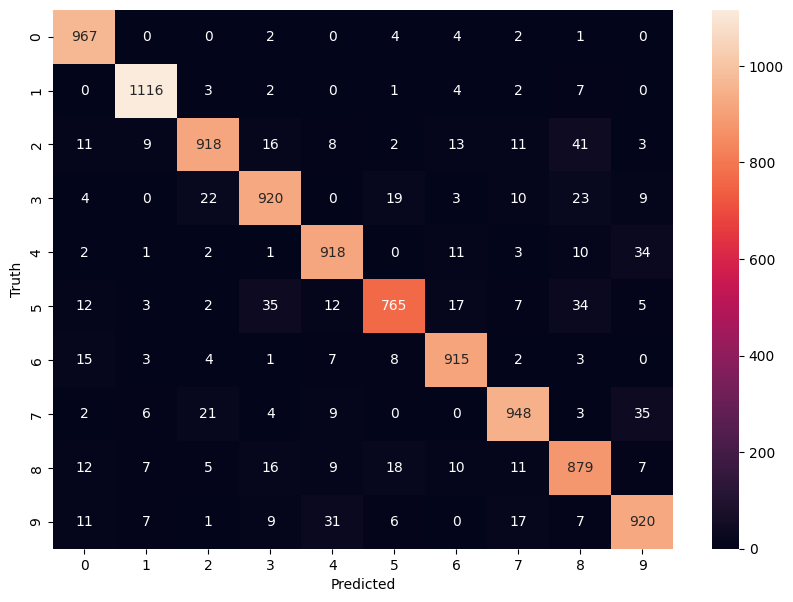

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2753 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1269 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0895 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0692 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0553 - accuracy: 0.9829


In [48]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0793 - accuracy: 0.9766


[0.07933735102415085, 0.9765999913215637]

In [49]:
predicted = model.predict(x_test_flattened)
labels_predicted = [np.argmax(i) for i in predicted]

313/313 [==============================] - 1s 3ms/step


In [50]:

cf_matrix = tf.math.confusion_matrix(predictions=labels_predicted,labels=y_test)

Text(95.72222222222221, 0.5, 'Truth')

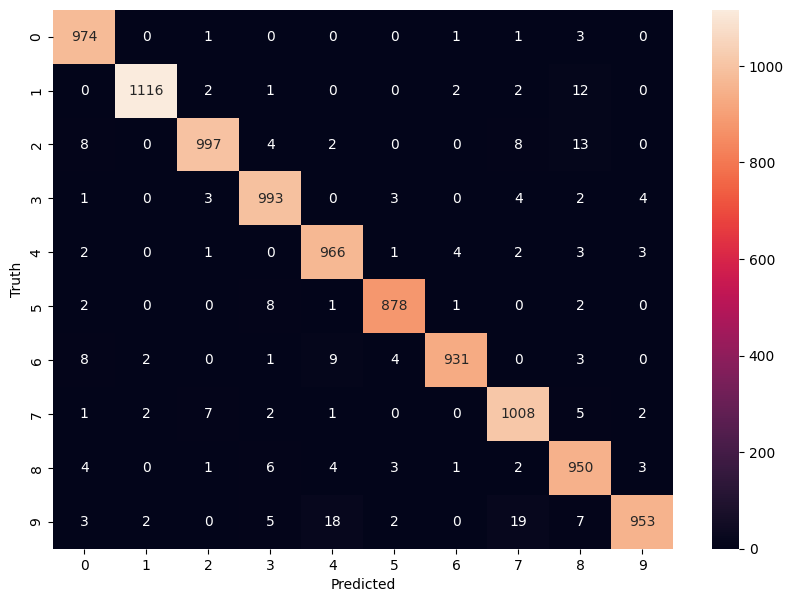

In [51]:

plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2775 - accuracy: 0.9209
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1256 - accuracy: 0.9629
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9739
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0428 - accuracy: 0.9868
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9894
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

Text(95.72222222222221, 0.5, 'Truth')

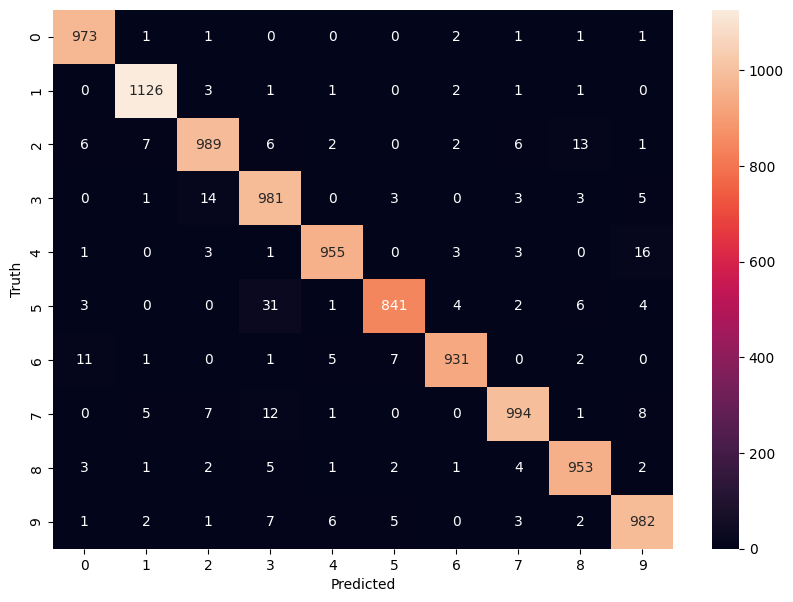

In [53]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=50)
model.evaluate(x_test_flattened,y_test)
predicted = model.predict(x_test_flattened)
labels_predicted = [np.argmax(i) for i in predicted]
cf_matrix = tf.math.confusion_matrix(predictions=labels_predicted,labels=y_test)
plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2945 - accuracy: 0.9157
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1445 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0999 - accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0758 - accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0468 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0379 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0297 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0240 - accuracy: 0.9936
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

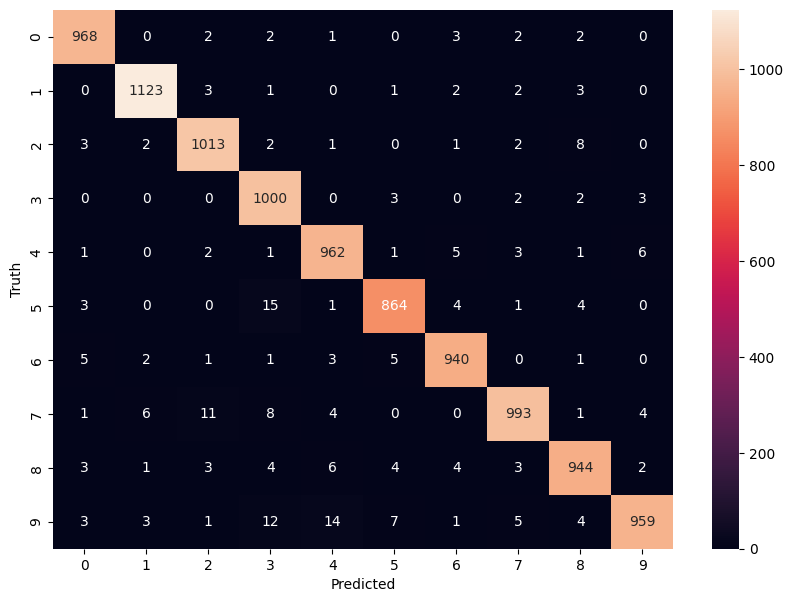

In [56]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10)
model.evaluate(x_test_flattened,y_test)
predicted = model.predict(x_test_flattened)
labels_predicted = [np.argmax(i) for i in predicted]
cf_matrix = tf.math.confusion_matrix(predictions=labels_predicted,labels=y_test)
plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')